# Package Importings

In [81]:
import pandas as pd

In [82]:
from geopy.distance import geodesic

In [266]:
import numpy as np

In [83]:
import calendar

In [341]:
from sklearn.linear_model import LinearRegression

In [343]:
from sklearn.model_selection import train_test_split

In [348]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Data Gathering

In [84]:
df_train = pd.read_csv("train.csv")
df_train.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98,40.74,-73.99,40.75,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.97,40.76,-73.96,40.77,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.97,40.80,-73.92,40.76,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-74.00,40.74,-73.99,40.73,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.98,40.74,-73.97,40.79,N,1225


In [85]:
df_test = pd.read_csv("test.csv")
df_test.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,N
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.96,40.77,-73.99,40.73,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.97,40.76,-73.96,40.76,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.99,40.75,-73.98,40.79,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.98,40.74,-73.95,40.72,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.01,40.70,-73.99,40.72,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.99,40.73,-73.88,40.88,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.99,40.75,-73.98,40.76,N


# Data Preprocessing

## Exploration of data

In [86]:
df_train.shape

(1458644, 11)

In [87]:
df_test.shape

(625134, 9)

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [90]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])

In [91]:
df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])

### NUll VALUES

In [92]:
df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [93]:
df_test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [94]:
df_test.passenger_count.unique()

array([1, 2, 4, 5, 3, 6, 0, 9], dtype=int64)

In [95]:
df_test.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

### Categorical variables

In [96]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named df_test with a categorical column 'store_and_fwd_flag'

# Perform label encoding
label_encoder = LabelEncoder()
df_test['store_and_fwd_flag'] = label_encoder.fit_transform(df_test['store_and_fwd_flag'])

In [97]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,0
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.96,40.77,-73.99,40.73,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.97,40.76,-73.96,40.76,0


In [98]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named df_test with a categorical column 'store_and_fwd_flag'

# Perform label encoding
label_encoder = LabelEncoder()
df_train['store_and_fwd_flag'] = label_encoder.fit_transform(df_train['store_and_fwd_flag'])

In [99]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,435


In [100]:
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
count,625134.00,625134.00,625134.00,625134.00,625134.00,625134.00,625134.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,0.01
std,0.50,1.31,0.07,0.03,0.07,0.04,0.07
min,1.00,0.00,-121.93,37.39,-121.93,36.60,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00
max,2.00,9.00,-69.25,42.81,-67.50,48.86,1.00


In [101]:
#40.690889 = lower fence(test)
#40.814897 = higher fence(test)
#abv higher fence below lower fence are outliers(test)(pickup latitude)

In [102]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,0.01,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,0.07,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,0.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,1.00,3526282.00


### Feature adding

In [104]:
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).miles

# Calculate distance between pickup and dropoff coordinates using the defined function
df_train['distance'] = df_train.apply(calculate_distance, axis=1)

In [105]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,455,0.93
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,663,1.12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,2124,3.96
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,429,0.92
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,435,0.74


In [106]:
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).miles

# Calculate distance between pickup and dropoff coordinates using the defined function
df_test['distance'] = df_test.apply(calculate_distance, axis=1)

In [107]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,0,1.70
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,0,1.71
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,0,0.81
3,id2150126,2,2016-06-30 23:59:41,1,-73.96,40.77,-73.99,40.73,0,3.27
4,id1598245,1,2016-06-30 23:59:33,1,-73.97,40.76,-73.96,40.76,0,0.60


In [108]:
df_train['pickup_date'] = df_train['pickup_datetime'].dt.date
df_train['pickup_day'] = df_train['pickup_datetime'].apply(lambda x: x.day)
df_train['pickup_hour'] = df_train['pickup_datetime'].apply(lambda x: x.hour)
df_train['pickup_day_of_the_week'] = df_train['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df_train['pickup_month'] = df_train['pickup_datetime'].apply(lambda x: x.month)
df_train['pickup_year'] = df_train['pickup_datetime'].apply(lambda x: x.year)
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_date,pickup_day,pickup_hour,pickup_day_of_the_week,pickup_month,pickup_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,455,0.93,2016-03-14,14,17,Monday,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,663,1.12,2016-06-12,12,0,Sunday,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,2124,3.96,2016-01-19,19,11,Tuesday,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,429,0.92,2016-04-06,6,19,Wednesday,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,435,0.74,2016-03-26,26,13,Saturday,3,2016


In [248]:
df_train['dropoff_hour'] = df_train['dropoff_datetime'].apply(lambda x: x.hour)
df_train['dropoff_month'] = df_train['dropoff_datetime'].apply(lambda x: x.month)

In [109]:
df_test['pickup_date'] = df_test['pickup_datetime'].dt.date
df_test['pickup_day'] = df_test['pickup_datetime'].apply(lambda x: x.day)
df_test['pickup_hour'] = df_train['pickup_datetime'].apply(lambda x: x.hour)
df_test['pickup_day_of_the_week'] = df_test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df_test['pickup_month'] = df_test['pickup_datetime'].apply(lambda x: x.month)
df_test['pickup_year'] = df_test['pickup_datetime'].apply(lambda x: x.year)
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_date,pickup_day,pickup_hour,pickup_day_of_the_week,pickup_month,pickup_year
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,0,1.70,2016-06-30,30,17,Thursday,6,2016
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,0,1.71,2016-06-30,30,0,Thursday,6,2016
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,0,0.81,2016-06-30,30,11,Thursday,6,2016
3,id2150126,2,2016-06-30 23:59:41,1,-73.96,40.77,-73.99,40.73,0,3.27,2016-06-30,30,19,Thursday,6,2016
4,id1598245,1,2016-06-30 23:59:33,1,-73.97,40.76,-73.96,40.76,0,0.60,2016-06-30,30,13,Thursday,6,2016


In [110]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,pickup_hour,pickup_month,pickup_year
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,0.01,959.49,2.14,15.50,13.61,3.52,2016.00
std,0.50,1.31,0.07,0.03,0.07,0.04,0.07,5237.43,2.67,8.70,6.40,1.68,0.00
min,1.00,0.00,-121.93,34.36,-121.93,32.18,0.00,1.00,0.00,1.00,0.00,1.00,2016.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,397.00,0.77,8.00,9.00,2.00,2016.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,662.00,1.30,15.00,14.00,4.00,2016.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1075.00,2.41,23.00,19.00,5.00,2016.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,1.00,3526282.00,770.82,31.00,23.00,6.00,2016.00


In [111]:
df_train = df_train[(df_train['pickup_longitude'] >= -74.3) & (df_train['pickup_longitude'] <= -73.7)].copy()
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_date,pickup_day,pickup_hour,pickup_day_of_the_week,pickup_month,pickup_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,455,0.93,2016-03-14,14,17,Monday,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,663,1.12,2016-06-12,12,0,Sunday,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,2124,3.96,2016-01-19,19,11,Tuesday,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,429,0.92,2016-04-06,6,19,Wednesday,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,435,0.74,2016-03-26,26,13,Saturday,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,0,778,0.76,2016-04-08,8,13,Friday,4,2016
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,0,655,3.76,2016-01-10,10,7,Sunday,1,2016
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,0,764,4.86,2016-04-22,22,6,Friday,4,2016
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,0,373,0.68,2016-01-05,5,15,Tuesday,1,2016


In [112]:
df_test = df_test[(df_train['pickup_longitude'] >= -74.3) & (df_test['pickup_longitude'] <= -73.7)].copy()
df_test

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\683149546.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[(df_train['pickup_longitude'] >= -74.3) & (df_test['pickup_longitude'] <= -73.7)].copy()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_date,pickup_day,pickup_hour,pickup_day_of_the_week,pickup_month,pickup_year
0,id3004672,1,2016-06-30 23:59:58,1,-73.99,40.73,-73.99,40.76,0,1.70,2016-06-30,30,17,Thursday,6,2016
1,id3505355,1,2016-06-30 23:59:53,1,-73.96,40.68,-73.96,40.66,0,1.71,2016-06-30,30,0,Thursday,6,2016
2,id1217141,1,2016-06-30 23:59:47,1,-74.00,40.74,-73.99,40.73,0,0.81,2016-06-30,30,11,Thursday,6,2016
3,id2150126,2,2016-06-30 23:59:41,1,-73.96,40.77,-73.99,40.73,0,3.27,2016-06-30,30,19,Thursday,6,2016
4,id1598245,1,2016-06-30 23:59:33,1,-73.97,40.76,-73.96,40.76,0,0.60,2016-06-30,30,13,Thursday,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.00,40.73,-74.00,40.73,0,0.60,2016-01-01,1,20,Friday,1,2016
625130,id3700764,1,2016-01-01 00:01:52,1,-74.01,40.74,-73.95,40.78,0,3.85,2016-01-01,1,21,Friday,1,2016
625131,id2568735,1,2016-01-01 00:01:24,2,-73.97,40.76,-73.88,40.75,0,5.08,2016-01-01,1,8,Friday,1,2016
625132,id1384355,1,2016-01-01 00:00:28,1,-73.98,40.73,-73.85,40.89,0,12.66,2016-01-01,1,3,Friday,1,2016


In [113]:
df_test.shape

(624993, 16)

In [116]:
#latitude from 40.4961° N (southernmost point) to 40.9156°(pickup)
df_test = df_test[(df_test['pickup_latitude'] >= 40.4961) & (df_test['pickup_latitude'] <= 40.9156)].copy()
df_train = df_train[(df_train['pickup_latitude'] >= 40.4961) & (df_train['pickup_latitude'] <= 40.9156)].copy()

In [118]:
#longitude for dropoff
df_test = df_test[(df_train['dropoff_longitude'].ge(-74.3)) & (df_test['dropoff_longitude'].le(-73.7))].copy()
df_train = df_train[(df_train['dropoff_longitude'].ge(-74.3)) & (df_train['dropoff_longitude'].le(-73.7))].copy()

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\3217845194.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[(df_train['dropoff_longitude'].ge(-74.3)) & (df_test['dropoff_longitude'].le(-73.7))].copy()


In [119]:
#latitude for dropoff
df_test = df_test[(df_test['dropoff_latitude'] >= 40.4961) & (df_test['dropoff_latitude'] <= 40.9156)].copy()
df_train = df_train[(df_train['dropoff_latitude'] >= 40.4961) & (df_train['dropoff_latitude'] <= 40.9156)].copy()

In [121]:
df_train.shape

(1457314, 18)

In [122]:
df_test.shape

(624258, 16)

In [145]:
# Conversion factor from miles to kilometers
conversion_factor = 1.60934
df_train['distance_km'] = df_train['distance'] * conversion_factor
df_test['distance_km'] =  df_test['distance'] * conversion_factor

### Data Visualization

In [143]:
df_train['pickup_day_of_the_week'].value_counts().sort_values(ascending=False)

Friday       223334
Saturday     220697
Thursday     218383
Wednesday    209955
Tuesday      202550
Sunday       195186
Monday       187209
Name: pickup_day_of_the_week, dtype: int64

In [ ]:
#Friday has the highest and monday has the least.

In [144]:
df_test['pickup_day_of_the_week'].value_counts().sort_values(ascending=False)

Friday       96129
Saturday     94107
Thursday     93343
Wednesday    89773
Tuesday      87165
Sunday       83472
Monday       80269
Name: pickup_day_of_the_week, dtype: int64

In [ ]:
#Friday has the highest and monday has the least.

#### Vendor_ID

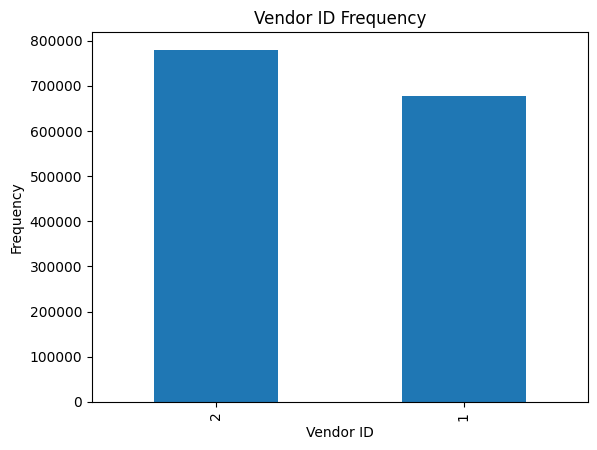

In [149]:
vendor_counts = df_train['vendor_id'].value_counts()

vendor_counts.plot(kind='bar')

plt.title('Vendor ID Frequency')
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#In this plot you can see that vendor 2 has the highest count than vendor 1. So most of the trip taken by the vendor id 2

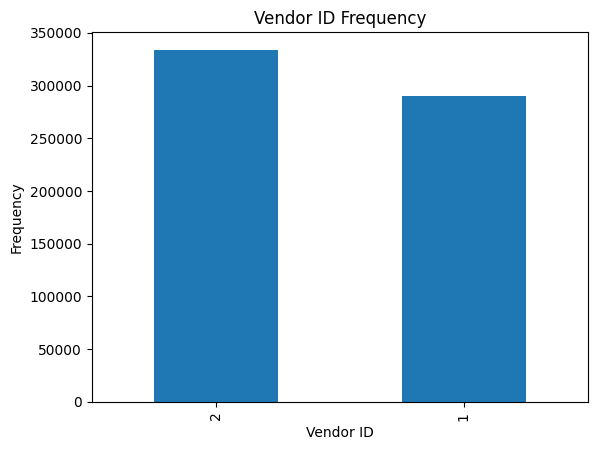

In [152]:
#test
vendor_counts = df_test['vendor_id'].value_counts()

vendor_counts.plot(kind='bar')

plt.title('Vendor ID Frequency')
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#(test)In this plot you can see that vendor 2 has the highest count than vendor 1. So most of the trip taken by the vendor id 2

#### store_and_fwd_flag

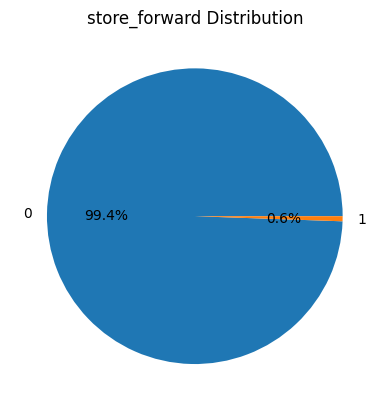

In [158]:
store_forward_count = df_train['store_and_fwd_flag'].value_counts()
plt.pie(store_forward_count, labels=store_forward_count.index, autopct='%1.1f%%')

plt.title('store_forward Distribution')

plt.show()


In [ ]:
#you can see only 0.6 percent that were forwarded

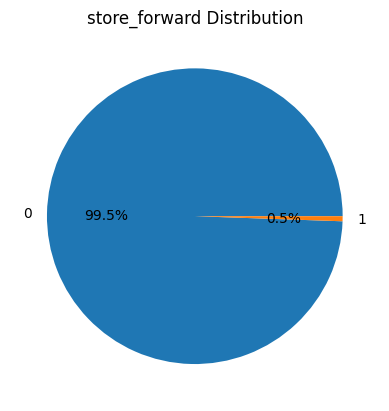

In [159]:
store_forward_count = df_test['store_and_fwd_flag'].value_counts()
plt.pie(store_forward_count, labels=store_forward_count.index, autopct='%1.1f%%')

plt.title('store_forward Distribution')


plt.show()

In [ ]:
#we can see only 0.5 percent that were forwarded

In [162]:
df_train['dropoff_day_of_the_week'] = df_train['dropoff_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

Text(0.5, 1.0, 'No of dropoffs done on each day')

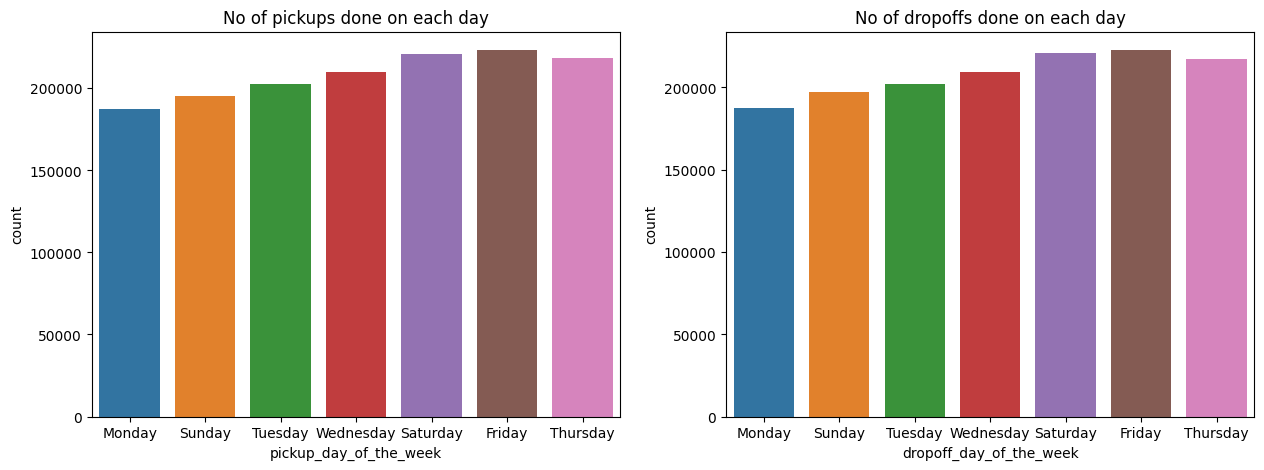

In [163]:
figure,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_day_of_the_week',data=df_train,ax=ax[0])
ax[0].set_title("No of pickups done on each day")
sns.countplot(x='dropoff_day_of_the_week',data=df_train,ax=ax[1])
ax[1].set_title('No of dropoffs done on each day')

In [ ]:
#Most of the taxis are booked on weekends

In [166]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,pickup_hour,pickup_day_of_the_week,pickup_month,pickup_year,trip_in_minutes,distance_km,dropoff_day_of_the_week,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,...,14,17,Monday,3,2016,7.58,1.50,Monday,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,...,12,0,Sunday,6,2016,11.05,1.81,Sunday,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,...,19,11,Tuesday,1,2016,35.40,6.38,Tuesday,midday,midday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,...,6,19,Wednesday,4,2016,7.15,1.48,Wednesday,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,...,26,13,Saturday,3,2016,7.25,1.19,Saturday,midday,midday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,0,...,8,13,Friday,4,2016,12.97,1.23,Friday,midday,midday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,0,...,10,7,Sunday,1,2016,10.92,6.05,Sunday,morning,morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,0,...,22,6,Friday,4,2016,12.73,7.82,Friday,morning,morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,0,...,5,15,Tuesday,1,2016,6.22,1.09,Tuesday,midday,evening


#### Pickup and Dropdown timezone

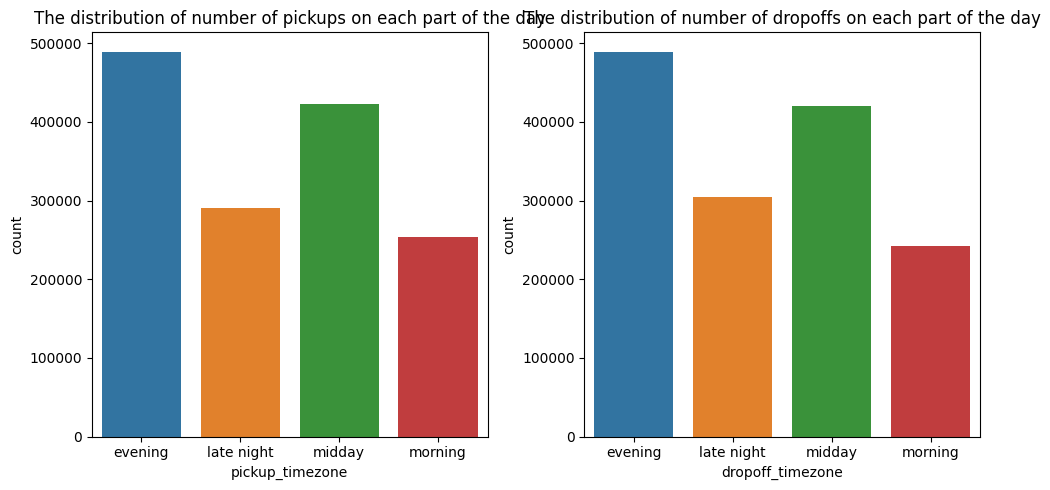

In [167]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df_train,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df_train,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

In [168]:
#most of the taxi are booked on eveninngs

#### trip_duration by month

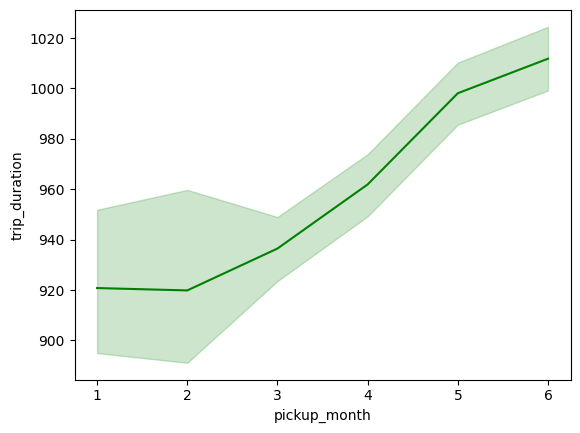

In [169]:
sns.lineplot(x='pickup_month',y='trip_duration',data=df_train,color='green')
plt.show()

In [ ]:
#After feb there is a rise in the trip duration every month

#### pickup hour

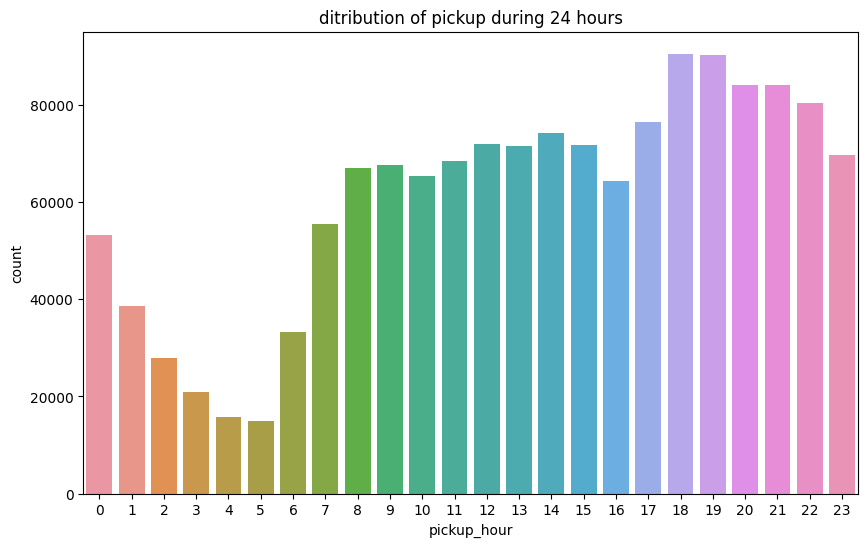

In [170]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_train["pickup_hour"])
plt.title("ditribution of pickup during 24 hours")
plt.show()

In [ ]:
Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening. We can see that people often use taxi services to get to their workplaces in the mornings after 10AM. and busiet time is 6PM to 7PM.

#### Monthly pickup by vendor

In [176]:
monthly_pickup_by_vendor=df_train.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()#pivot table

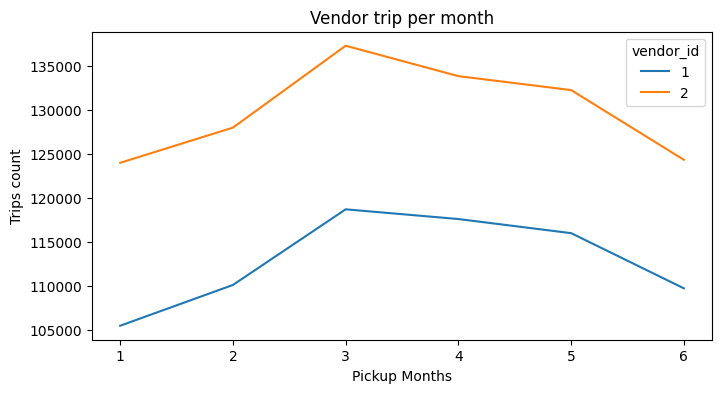

In [180]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

In [ ]:
#the trip counts are at the highest in the month of march for both vendors and least in the month of january

#### passenger count

In [184]:
passenger_c = df_train.passenger_count.value_counts()
passenger_c

1    1032548
2     210128
5      78044
3      59846
6      48310
4      28374
0         60
7          2
9          1
8          1
Name: passenger_count, dtype: int64

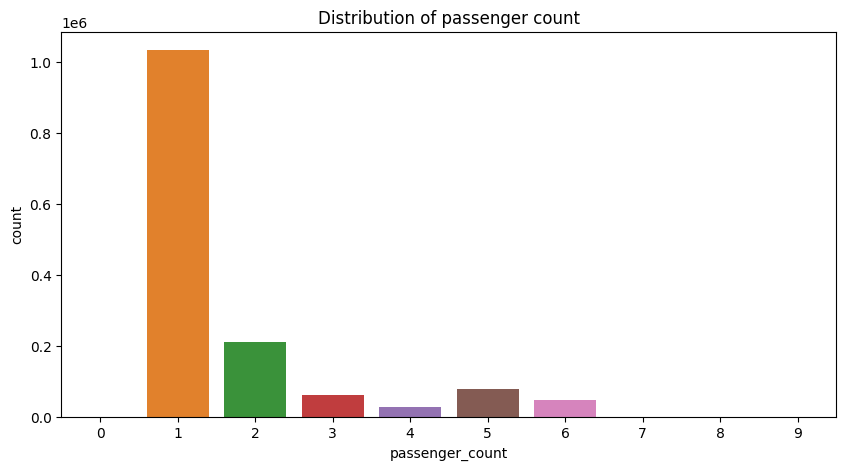

In [188]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_train["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

In [189]:
#Most of the rides are done by one person.That means people are prefering solo rides.

#### Trip Duration in minutes

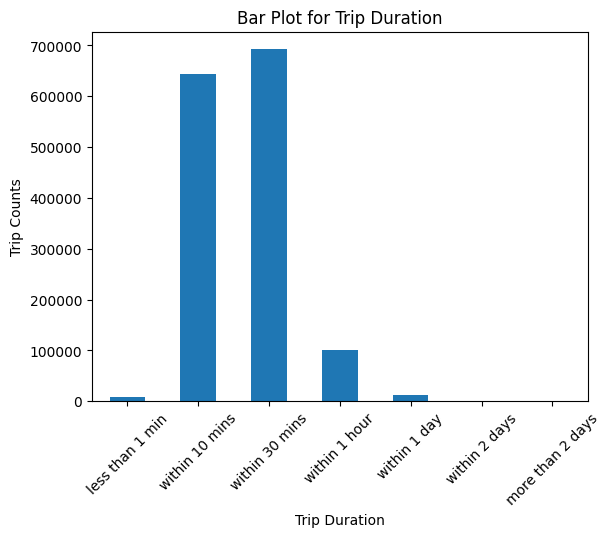

In [196]:
bins = [0, 1, 10, 30, 60, 1440, 1440*2, 50000]
labels = ['less than 1 min', 'within 10 mins', 'within 30 mins', 'within 1 hour', 'within 1 day', 'within 2 days', 'more than 2 days']


df_train['trip_duration_bins'] = pd.cut(df_train['trip_in_minutes'], bins=bins, labels=labels)

df_train.groupby('trip_duration_bins').size().plot(kind='bar')

plt.title('Bar Plot for Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Trip Counts')
plt.xticks(rotation=45)

plt.show()


In [ ]:
#within a day most of the trip duration is for 30 min and some are for 1 hour and within a day is rare.

#### distribution of differnt features

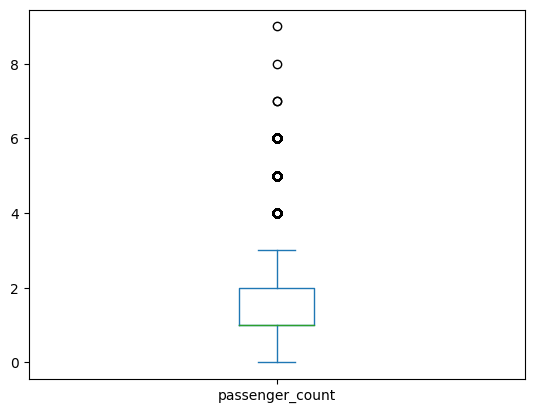

In [198]:
ax = df_train['passenger_count'].plot.box()

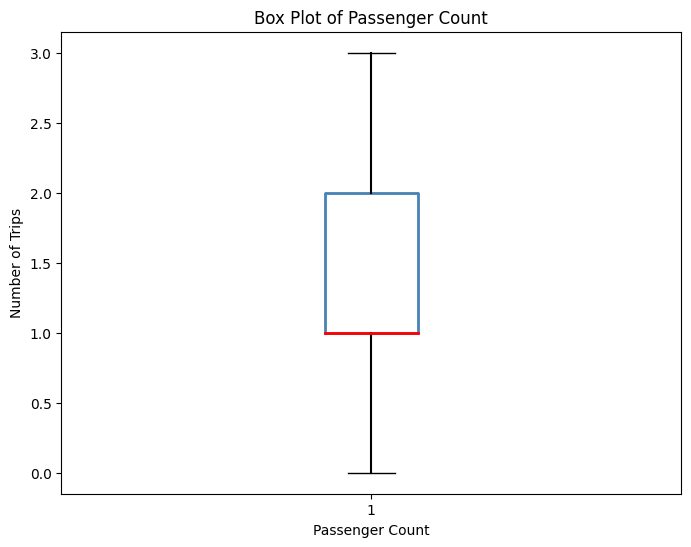

In [199]:
fig, ax = plt.subplots(figsize=(8, 6))

box_props = dict(color='steelblue', linewidth=2)
whisker_props = dict(color='black', linewidth=1.5)
median_props = dict(color='red', linewidth=2)
ax.boxplot(df_train['passenger_count'], showfliers=False, boxprops=box_props, whiskerprops=whisker_props, medianprops=median_props)

ax.set_xlabel('Passenger Count')
ax.set_ylabel('Number of Trips')
ax.set_title('Box Plot of Passenger Count')

plt.show()

In [201]:
#using the both box plots visualizations we can say that median = 1 and there are outliers in the passenger count.

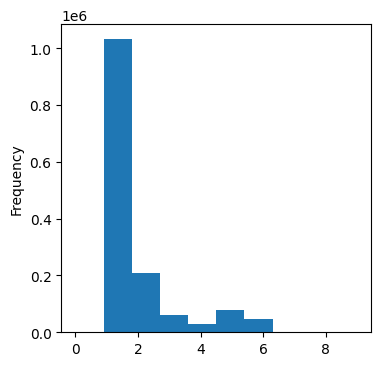

In [215]:
ax = df_train['passenger_count'].plot.hist(figsize=(4,4))

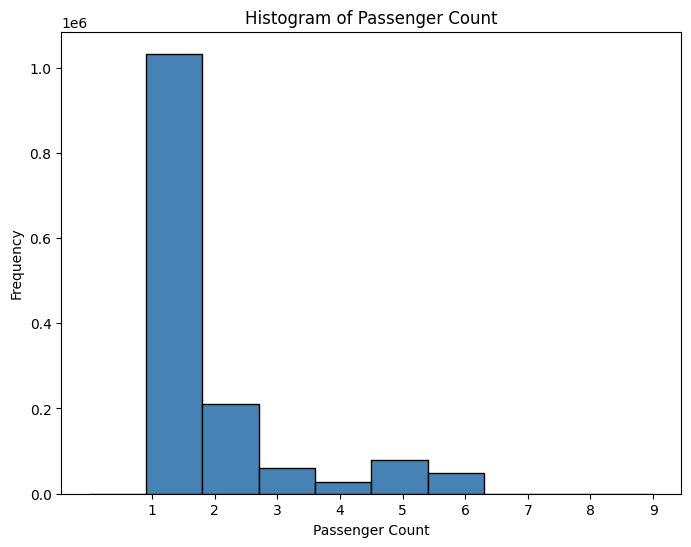

In [216]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df_train['passenger_count'], bins=10, color='steelblue', edgecolor='black')

ax.set_xlabel('Passenger Count')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Passenger Count')

ax.set_xticks(range(1, df_train['passenger_count'].max() + 1))

plt.show()

In [210]:
#distance_km

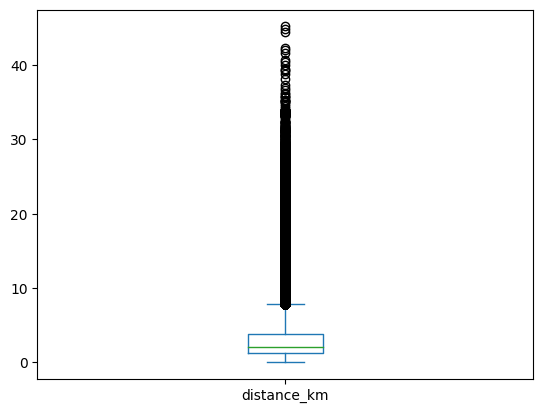

In [209]:
ax = df_train['distance_km'].plot.box()

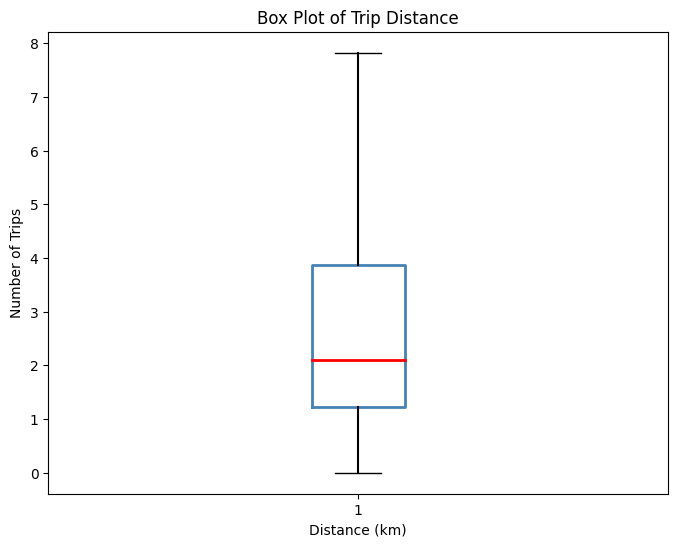

In [206]:

fig, ax = plt.subplots(figsize=(8, 6))

box_props = dict(color='steelblue', linewidth=2)
whisker_props = dict(color='black', linewidth=1.5)
median_props = dict(color='red', linewidth=2)
ax.boxplot(df_train['distance_km'], showfliers=False, boxprops=box_props, whiskerprops=whisker_props, medianprops=median_props)

ax.set_xlabel('Distance (km)')
ax.set_ylabel('Number of Trips')
ax.set_title('Box Plot of Trip Distance')

plt.show()

In [213]:
#By these two visualizations of box plot we can say that median around 2 and there are outliers in the distance

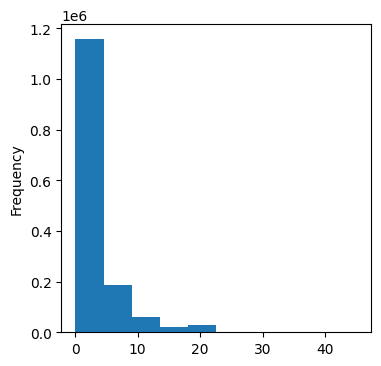

In [217]:
ax = df_train['distance_km'].plot.hist(figsize=(4,4))

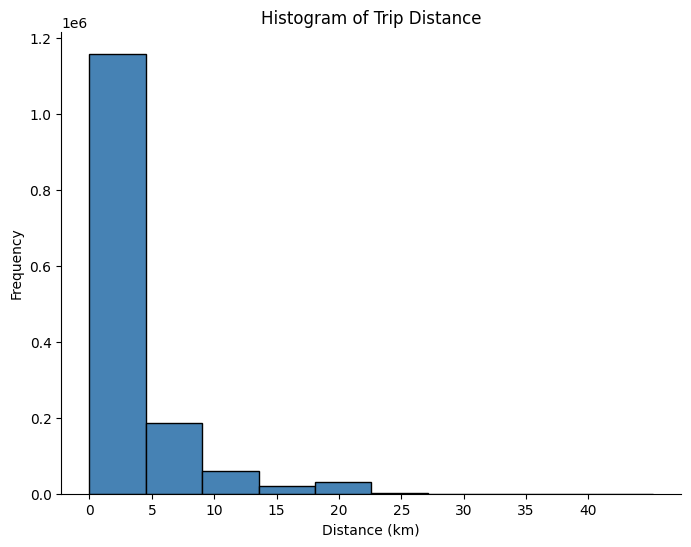

In [224]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df_train['distance_km'], bins=10, color='steelblue', edgecolor='black')

ax.set_xlabel('Distance (km)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Trip Distance')

x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
x_labels = ['0', '5', '10', '15', '20', '25', '30', '35', '40']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [225]:
#you can see there is skewness in this histogram plot for distance.

In [226]:
#trip_duration_in_minute

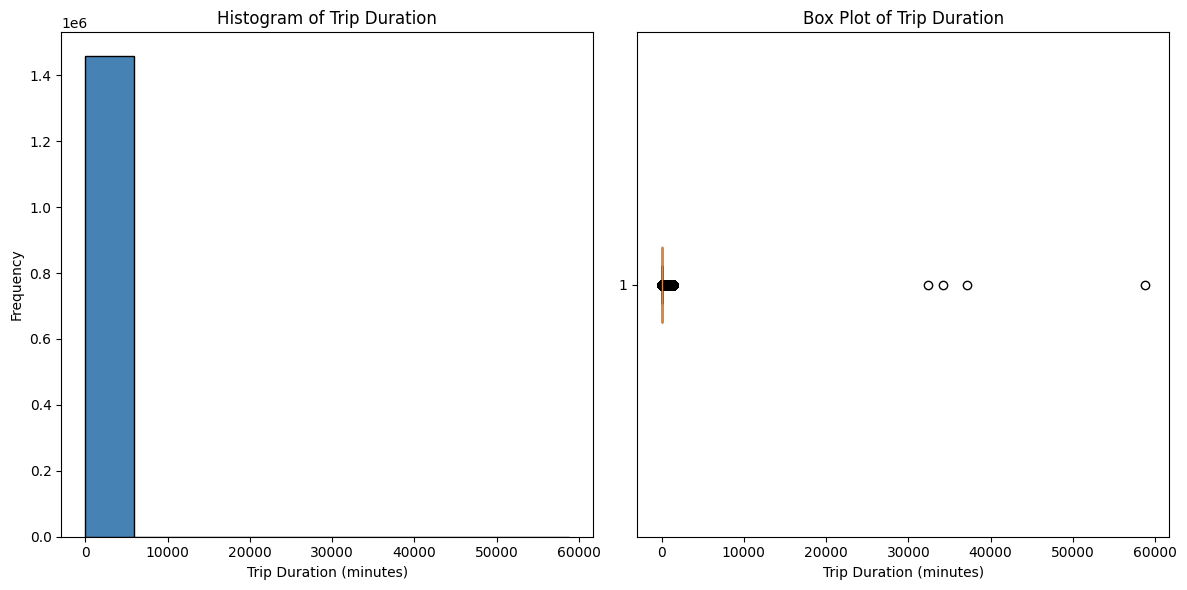

In [229]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df_train['trip_in_minutes'], bins=10, color='steelblue', edgecolor='black')
ax1.set_xlabel('Trip Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Trip Duration')

ax2.boxplot(df_train['trip_in_minutes'], vert=False)
ax2.set_xlabel('Trip Duration (minutes)')
ax2.set_title('Box Plot of Trip Duration')

plt.tight_layout()

plt.show()


In [234]:
#in this visualization we can see that there is skewness in hsitogram and outliers in box plot.

In [235]:
#pickup_hour

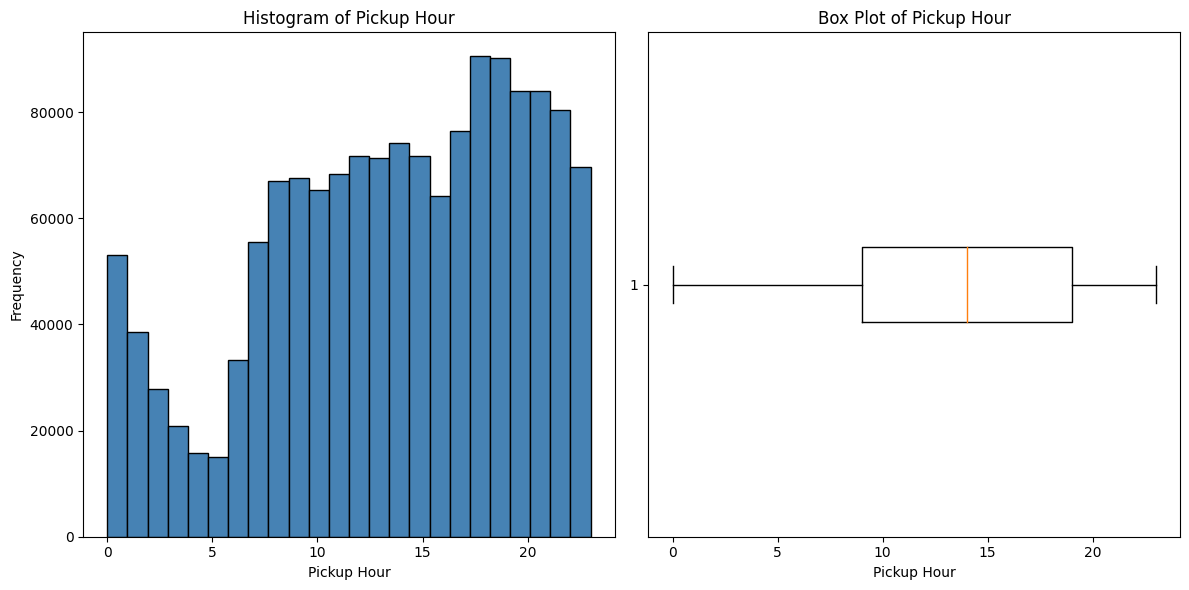

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df_train['pickup_hour'], bins=24, color='steelblue', edgecolor='black')
ax1.set_xlabel('Pickup Hour')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Pickup Hour')

ax2.boxplot(df_train['pickup_hour'], vert=False)
ax2.set_xlabel('Pickup Hour')
ax2.set_title('Box Plot of Pickup Hour')

plt.tight_layout()

plt.show()

In [237]:
#drop_off hour

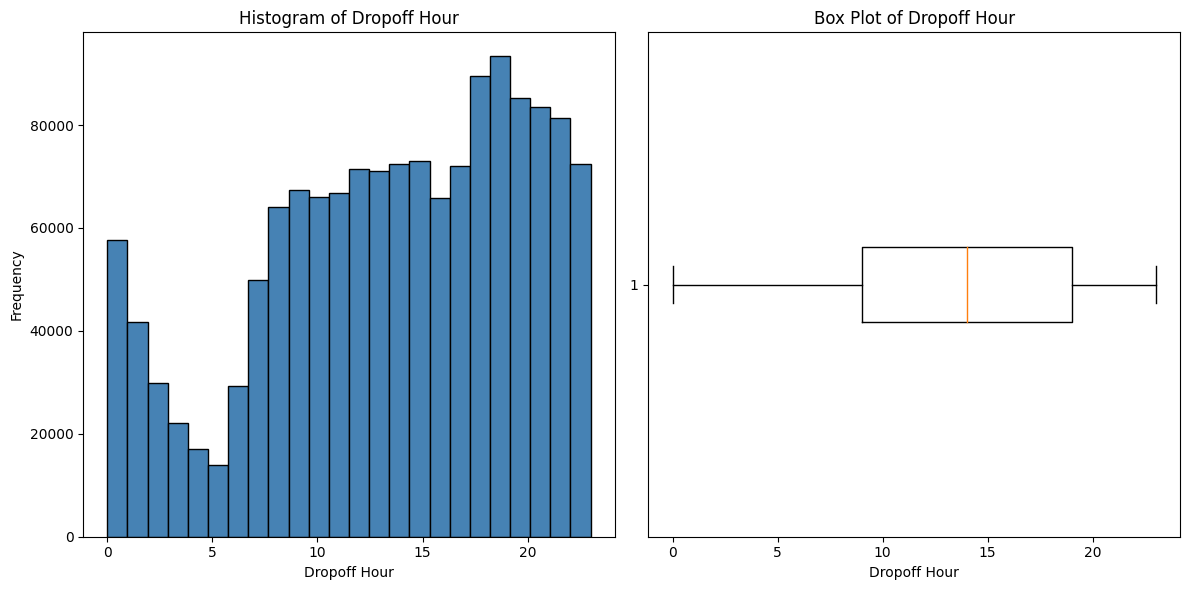

In [242]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df_train['dropoff_hour'], bins=24, color='steelblue', edgecolor='black')
ax1.set_xlabel('Dropoff Hour')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Dropoff Hour')

ax2.boxplot(df_train['dropoff_hour'], vert=False)
ax2.set_xlabel('Dropoff Hour')
ax2.set_title('Box Plot of Dropoff Hour')

plt.tight_layout()

plt.show()

### **(histogram) distance and trip_duration graphs are highly skewed.**

### **(boxplot) distance and trip_duration columns have a lot outliers as well**

In [312]:
#Lets check this for df_test also

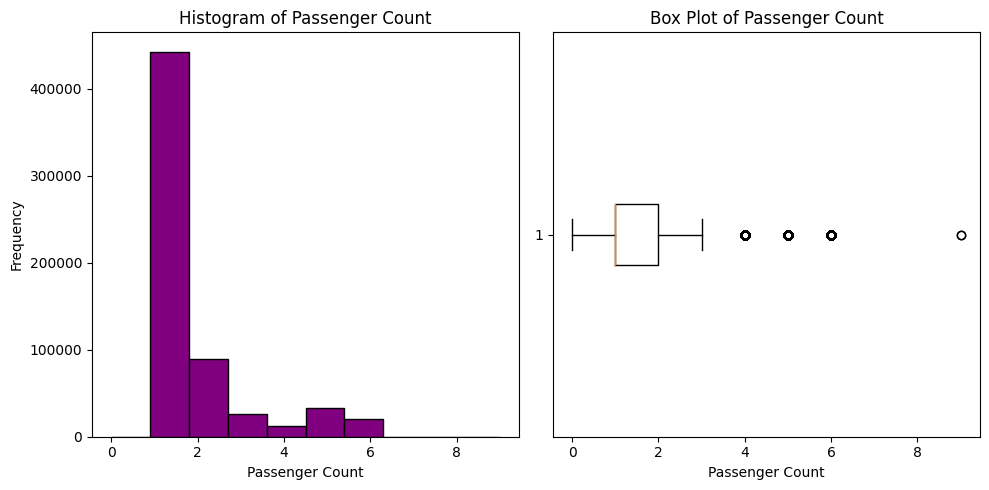

In [315]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(df_test['passenger_count'], bins=10, color='purple', edgecolor='black')
ax1.set_xlabel('Passenger Count')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Passenger Count')

ax2.boxplot(df_test['passenger_count'], vert=False)
ax2.set_xlabel('Passenger Count')
ax2.set_title('Box Plot of Passenger Count')

plt.tight_layout()

plt.show()

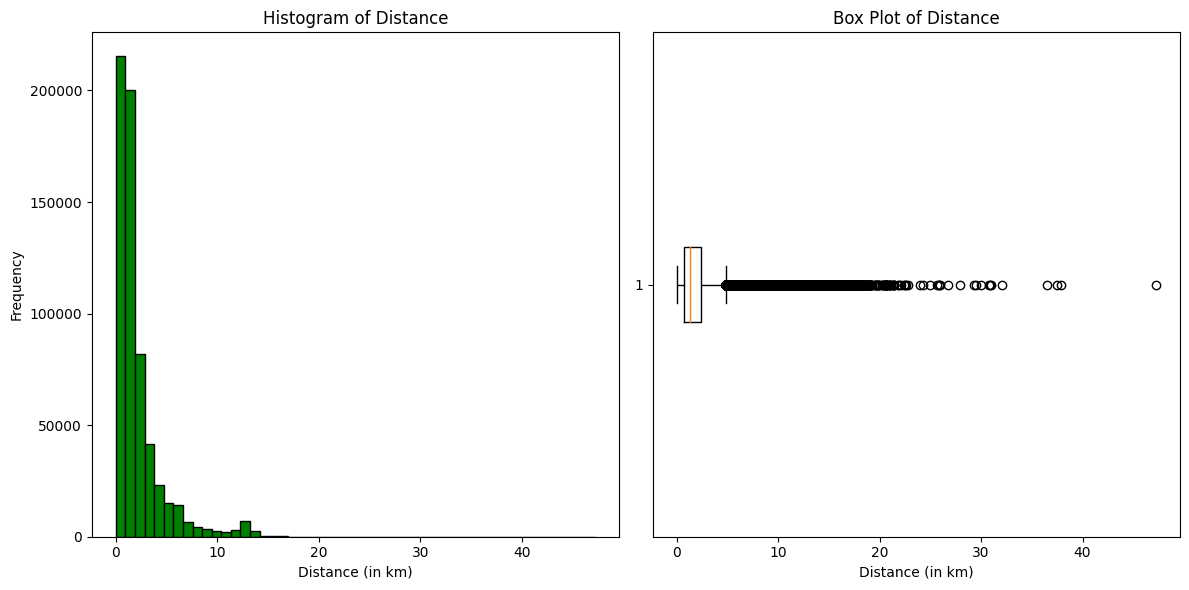

In [317]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df_test['distance'], bins=50, color='green', edgecolor='black')
ax1.set_xlabel('Distance (in km)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Distance')

ax2.boxplot(df_test['distance'], vert=False)
ax2.set_xlabel('Distance (in km)')
ax2.set_title('Box Plot of Distance')

plt.tight_layout()

plt.show()

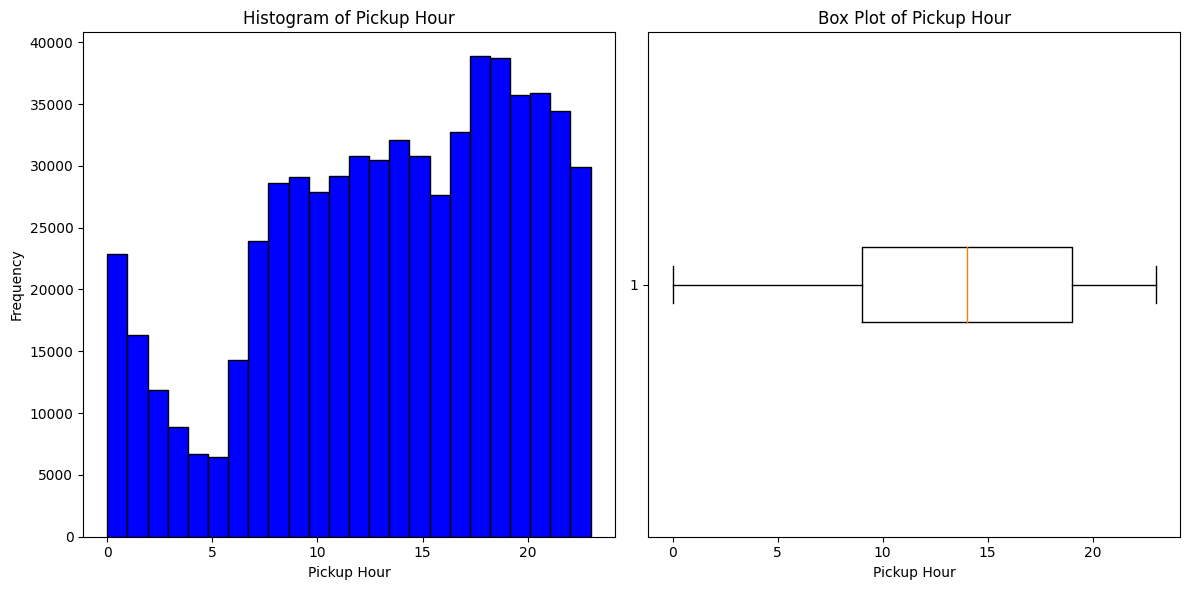

In [321]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df_test['pickup_hour'], bins=24, color='blue', edgecolor='black')
ax1.set_xlabel('Pickup Hour')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Pickup Hour')

ax2.boxplot(df_test['pickup_hour'], vert=False)
ax2.set_xlabel('Pickup Hour')
ax2.set_title('Box Plot of Pickup Hour')

plt.tight_layout()

plt.show()

### (histplot) distance and passenger count graph are highly skewed.
### (boxplot) distance and passenger count columns have a lot outliers as well

## Multicollinearity and correlation check

### **Heatmap**

In [260]:
# correlation matrix calculation
correlation_matrix = df_train.corr()

# filteration of highly correlated features
highly_correlated = correlation_matrix.abs() > 0.8
correlated_features = set()

# names of the highly correlated features
for i in range(len(highly_correlated.columns)):
    for j in range(i):
        if highly_correlated.iloc[i, j]:
            feature_i = highly_correlated.columns[i]
            feature_j = highly_correlated.columns[j]
            correlated_features.add(feature_i)
            correlated_features.add(feature_j)

# conversion into a list
correlated_features = list(correlated_features)

# Print the highly correlated features
print("Highly correlated features:")
print(correlated_features)


C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\1805786825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


Highly correlated features:
['dropoff_month', 'pickup_month', 'trip_duration', 'distance_km', 'pickup_hour', 'distance', 'trip_in_minutes', 'dropoff_hour']


In [324]:
#these are the highly correlated features. so we can remove it to red

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\4032808678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_train.corr()


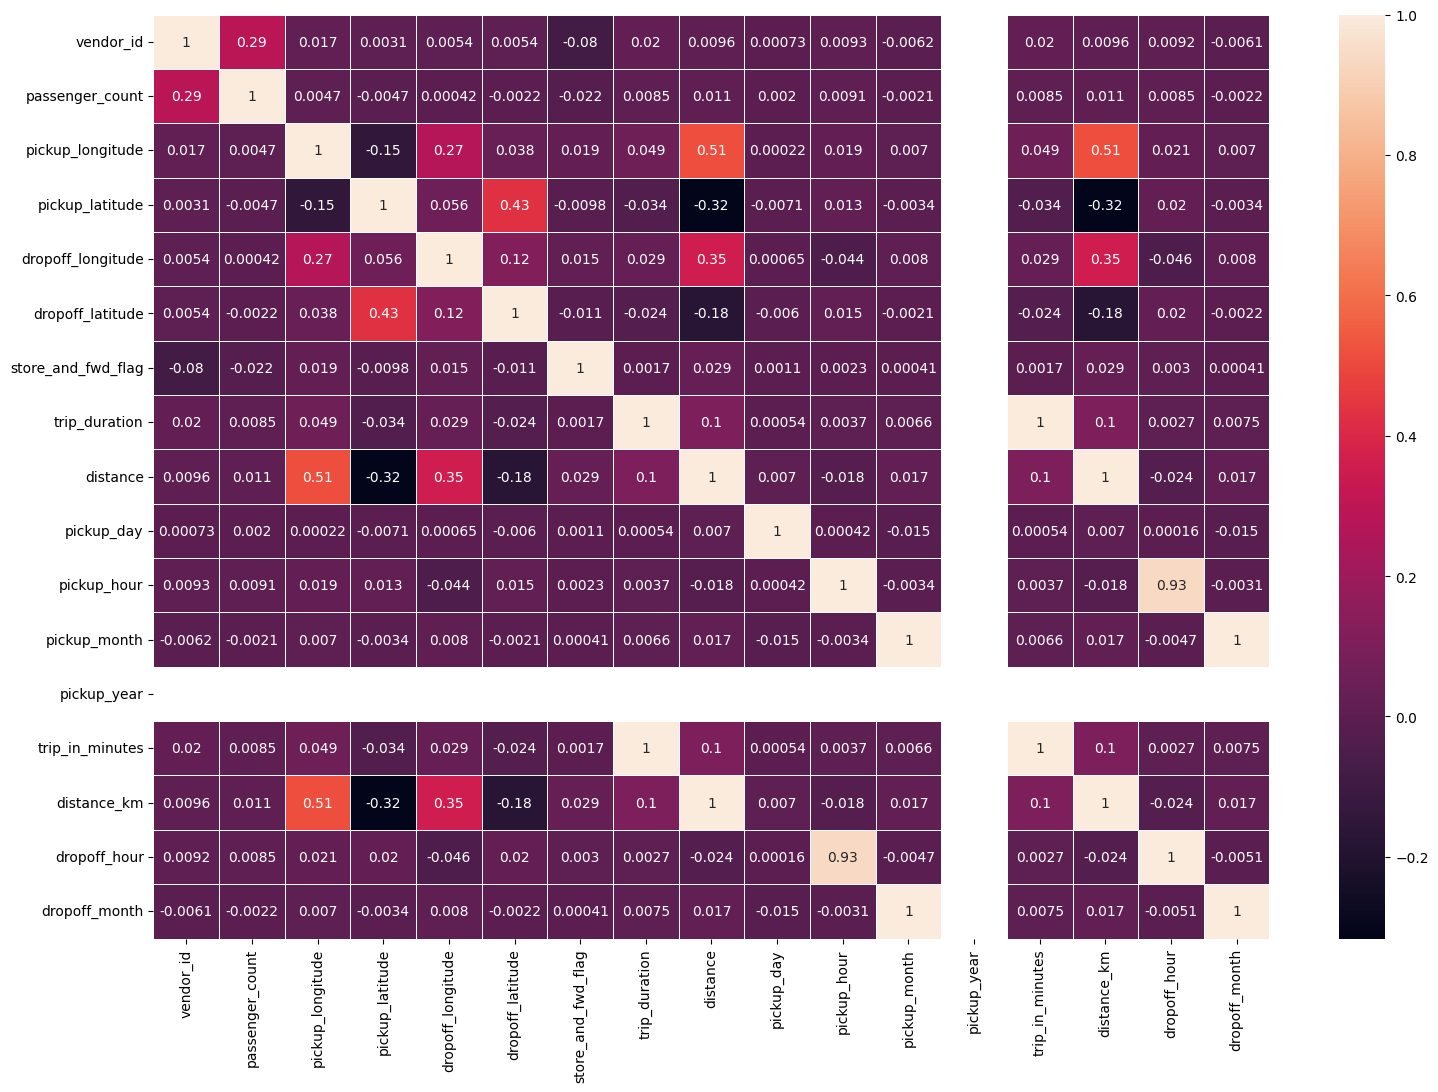

In [257]:
#heatmap
plt.figure(figsize=(18, 12))
correlation = df_train.corr()
sns.heatmap(correlation, annot=True,linewidths=0.5)
plt.show()

In [323]:
#df_test

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\3974632542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_test.corr()


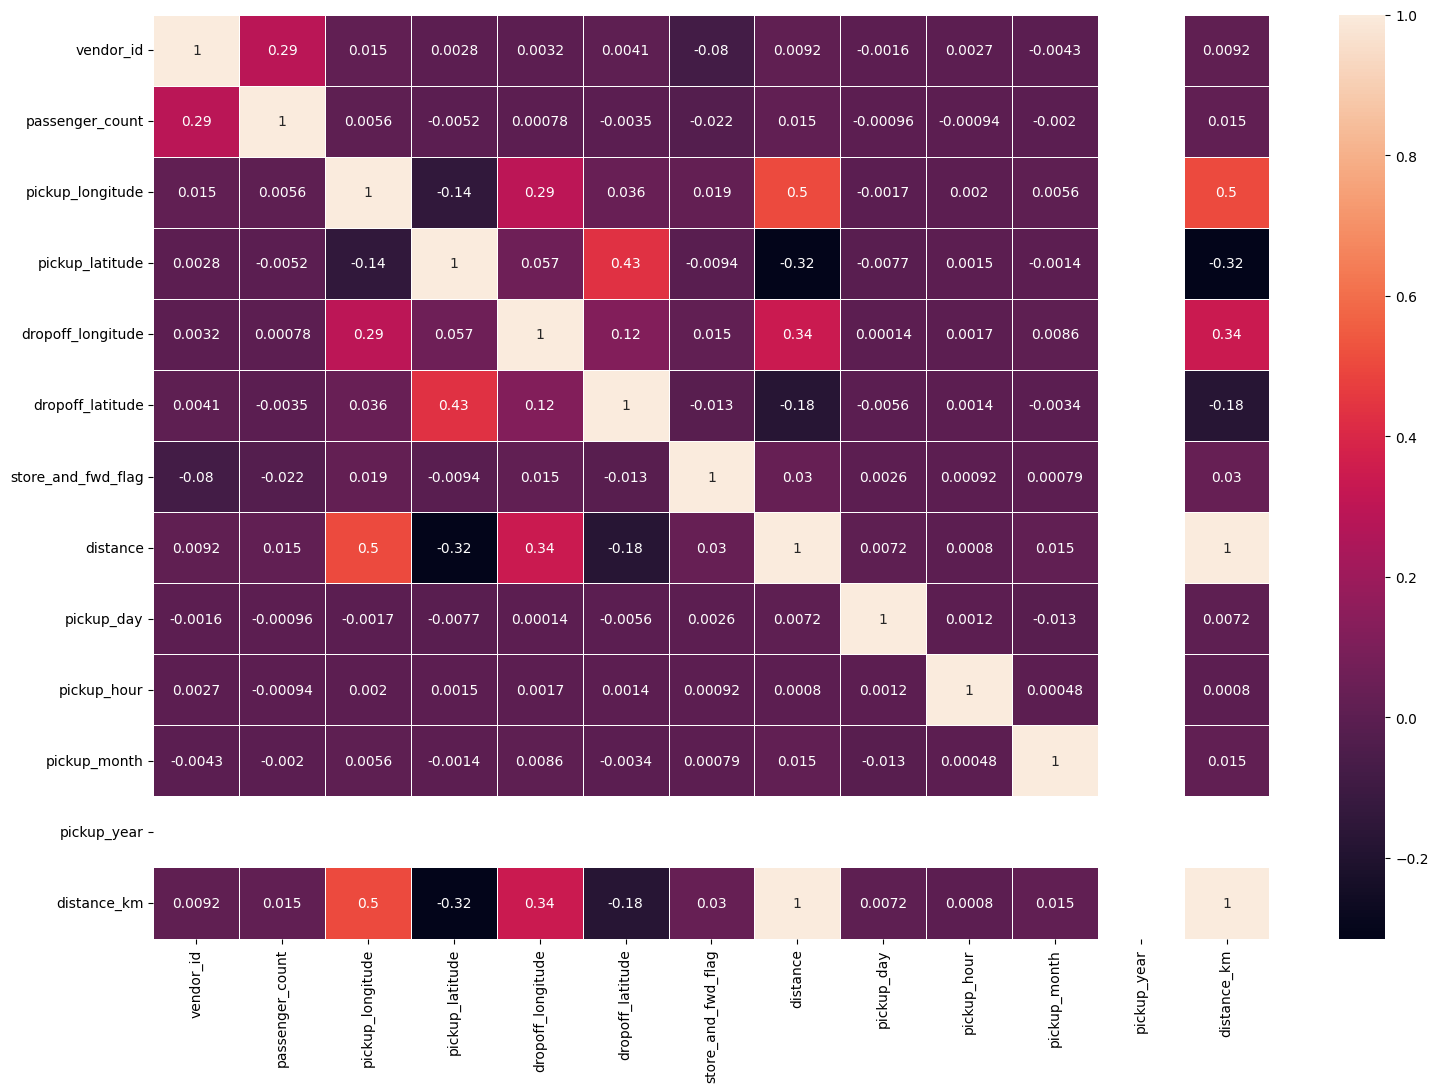

In [322]:
#heatmap
plt.figure(figsize=(18, 12))
correlation = df_test.corr()
sns.heatmap(correlation, annot=True,linewidths=0.5)
plt.show()

In [325]:
correlation_matrix_test = df_test.corr()

highly_correlated_test = correlation_matrix_test.abs() > 0.8
correlated_features_test = set()

for i in range(len(highly_correlated_test.columns)):
    for j in range(i):
        if highly_correlated_test.iloc[i, j]:
            feature_i = highly_correlated_test.columns[i]
            feature_j = highly_correlated_test.columns[j]
            correlated_features_test.add(feature_i)
            correlated_features_test.add(feature_j)
            
correlated_features_test = list(correlated_features_test)

print("Highly correlated features in df_test:")
print(correlated_features_test)


C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\857320877.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_test = df_test.corr()


Highly correlated features in df_test:
['distance', 'distance_km']


## Checking skewness

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\2185850368.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["trip_duration"], color="red", ax=ax[0], hist=False, kde_kws={"shade": True, "linewidth": 2})
C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\2185850368.py:9: Use

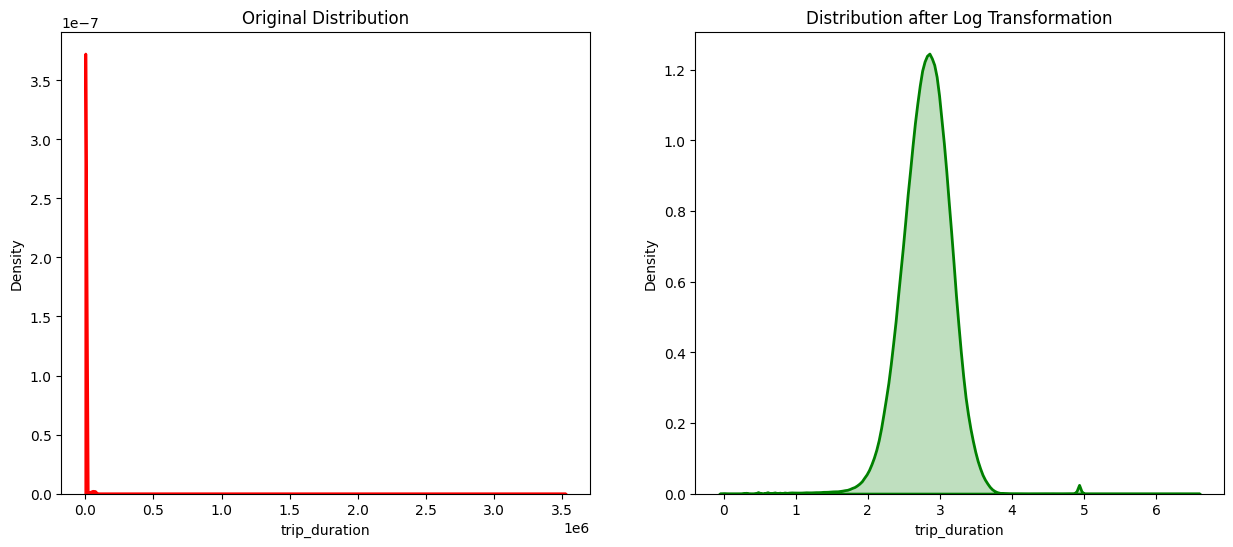

In [267]:
# Create a side-by-side comparison of two distribution plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the original distribution of trip_duration
sns.distplot(df_train["trip_duration"], color="red", ax=ax[0], hist=False, kde_kws={"shade": True, "linewidth": 2})
ax[0].set_title("Original Distribution")

# Plot the distribution after applying log transformation
sns.distplot(np.log10(df_train["trip_duration"]), color="green", ax=ax[1], hist=False, kde=True, kde_kws={"shade": True, "linewidth": 2})
ax[1].set_title("Distribution after Log Transformation")

# Show the plots
plt.show()

In [268]:
#By above distribution we can see that target variable is higly right skewed .to remove the skewness we apply log transformation.after transformation we found normal distribution of targer variable.

# **Outlier Removal (Quartile Method)**

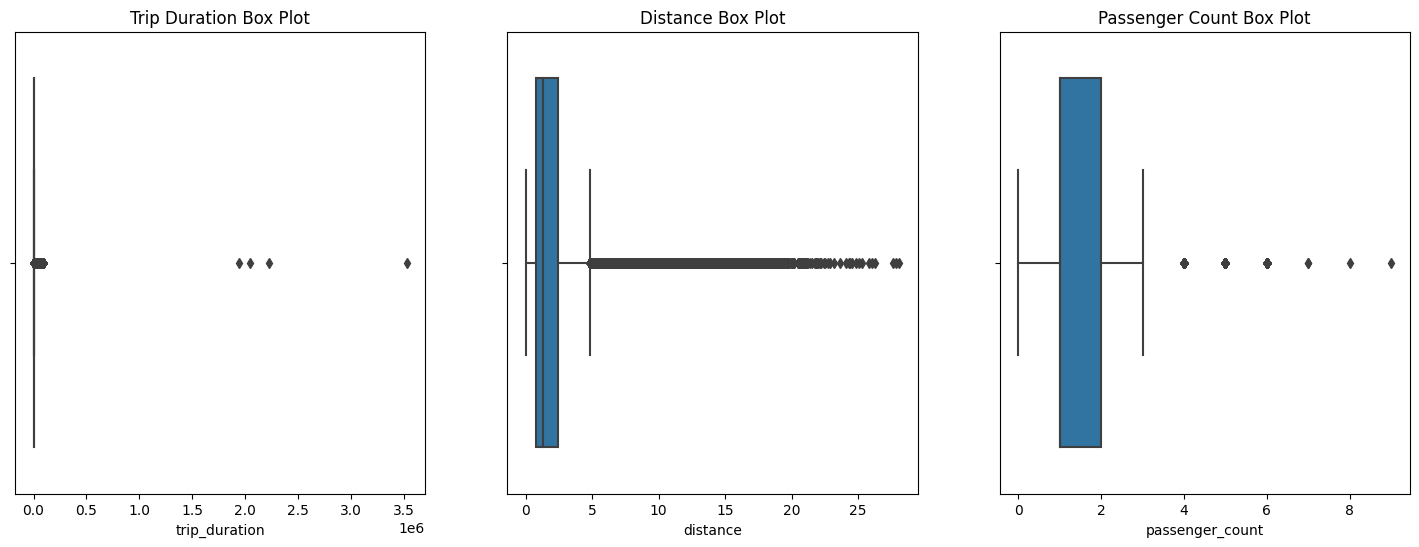

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x=df_train["trip_duration"], ax=ax[0])
ax[0].set_title("Trip Duration Box Plot")

sns.boxplot(x=df_train["distance"], ax=ax[1])
ax[1].set_title("Distance Box Plot")

sns.boxplot(x=df_train["passenger_count"], ax=ax[2])
ax[2].set_title("Passenger Count Box Plot")

plt.show()

In [275]:

Q1_trip_duration = df_train["trip_duration"].quantile(0.25)
print('first quartile value ie 25th percentile of trip duration:',Q1_trip_duration)
Q3_trip_duration = df_train["trip_duration"].quantile(0.75)
print('third quartile value ie 75th percentile of trip duration:',Q3_trip_duration)

first quartile value ie 25th percentile of trip duration: 397.0
third quartile value ie 75th percentile of trip duration: 1074.0


In [277]:

IQR_trip_duration = Q3_trip_duration - Q1_trip_duration

lower_bound_trip_duration = Q1_trip_duration - 1.5 * IQR_trip_duration
upper_bound_trip_duration = Q3_trip_duration + 1.5 * IQR_trip_duration
print('The lower limit of trip duration:',lower_bound_trip_duration)
print('The upper limit of trip duration:',upper_bound_trip_duration)

The lower limit of trip duration: -618.5
The upper limit of trip duration: 2089.5


In [278]:
df_train.shape

(1457314, 26)

In [279]:
df_train = df_train[(df_train["trip_duration"] >= lower_bound_trip_duration) & (df_train["trip_duration"] <= upper_bound_trip_duration)]

In [280]:
df_train.shape

(1383432, 26)

In [281]:
Q1_distance = df_train["distance"].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',Q1_distance)

Q3_distance = df_train["distance"].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',Q3_distance)

first quartile value ie 25th percentile of distance: 0.7448217663341489
third quartile value ie 75th percentile of distance: 2.1639895801169056


In [283]:

IQR_distance = Q3_distance - Q1_distance

lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

print('The lower limit of distance:',lower_bound_distance)
print('The upper limit of distance:',upper_bound_distance)

The lower limit of distance: -1.383929954339986
The upper limit of distance: 4.29274130079104


In [284]:
df_train = df_train[(df_train["distance"] >= lower_bound_distance) & (df_train["distance"] <= upper_bound_distance)]

In [285]:
df_train.shape

(1276071, 26)

In [287]:
Q1_passenger_count = df_train["passenger_count"].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',Q1_distance)

Q3_passenger_count = df_train["passenger_count"].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',Q3_distance)

first quartile value ie 25th percentile of distance: 0.7448217663341489
third quartile value ie 75th percentile of distance: 2.1639895801169056


In [288]:
IQR_passenger_count = Q3_passenger_count - Q1_passenger_count

lower_bound_passenger_count = Q1_passenger_count - 1.5 * IQR_passenger_count
upper_bound_passenger_count = Q3_passenger_count + 1.5 * IQR_passenger_count

print('The lower limit of distance:',lower_bound_distance)
print('The upper limit of distance:',upper_bound_distance)

The lower limit of distance: -1.383929954339986
The upper limit of distance: 4.29274130079104


In [289]:
df_train = df_train[(df_train["passenger_count"] >= lower_bound_passenger_count) & (df_train["passenger_count"] <= upper_bound_passenger_count)]

In [290]:
df_train.shape

(1141470, 26)

In [329]:
#df_test

In [331]:
Q1_distance = df_test['distance'].quantile(0.25)
Q3_distance = df_test['distance'].quantile(0.75)

Q1_passenger_count = df_test['passenger_count'].quantile(0.25)
Q3_passenger_count = df_test['passenger_count'].quantile(0.75)

IQR_distance = Q3_distance - Q1_distance
IQR_passenger_count = Q3_passenger_count - Q1_passenger_count

lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

lower_bound_passenger_count = Q1_passenger_count - 1.5 * IQR_passenger_count
upper_bound_passenger_count = Q3_passenger_count + 1.5 * IQR_passenger_count

df_test = df_test[(df_test['distance'] >= lower_bound_distance) & (df_test['distance'] <= upper_bound_distance)]
df_test = df_test[(df_test['passenger_count'] >= lower_bound_passenger_count) & (df_test['passenger_count'] <= upper_bound_passenger_count)]

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\2569085283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['distance'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, color="green", ax=ax[0])
C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\2569085283.py

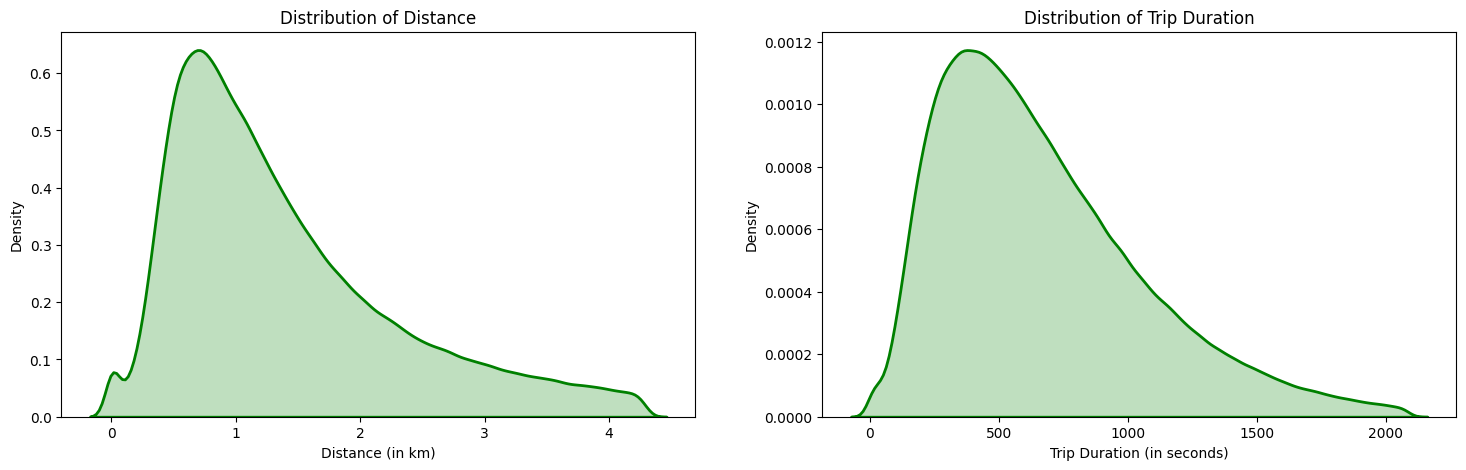

In [292]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
sns.distplot(df_train['distance'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, color="green", ax=ax[0])
sns.distplot(df_train['trip_duration'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, color="green", ax=ax[1])

ax[0].set_title("Distribution of Distance")
ax[0].set_xlabel("Distance (in km)")
ax[0].set_ylabel("Density")

ax[1].set_title("Distribution of Trip Duration")
ax[1].set_xlabel("Trip Duration (in seconds)")
ax[1].set_ylabel("Density")

plt.show()


In [293]:
#both distance and trip duration are now nearly to normal distribution

In [332]:
#df_test(distance)

C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Temp\ipykernel_25324\3686668647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['distance'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, color="green", ax=ax)
C:\Users\S.S.S.Dhyuthidhar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0, 0.5, 'Density')

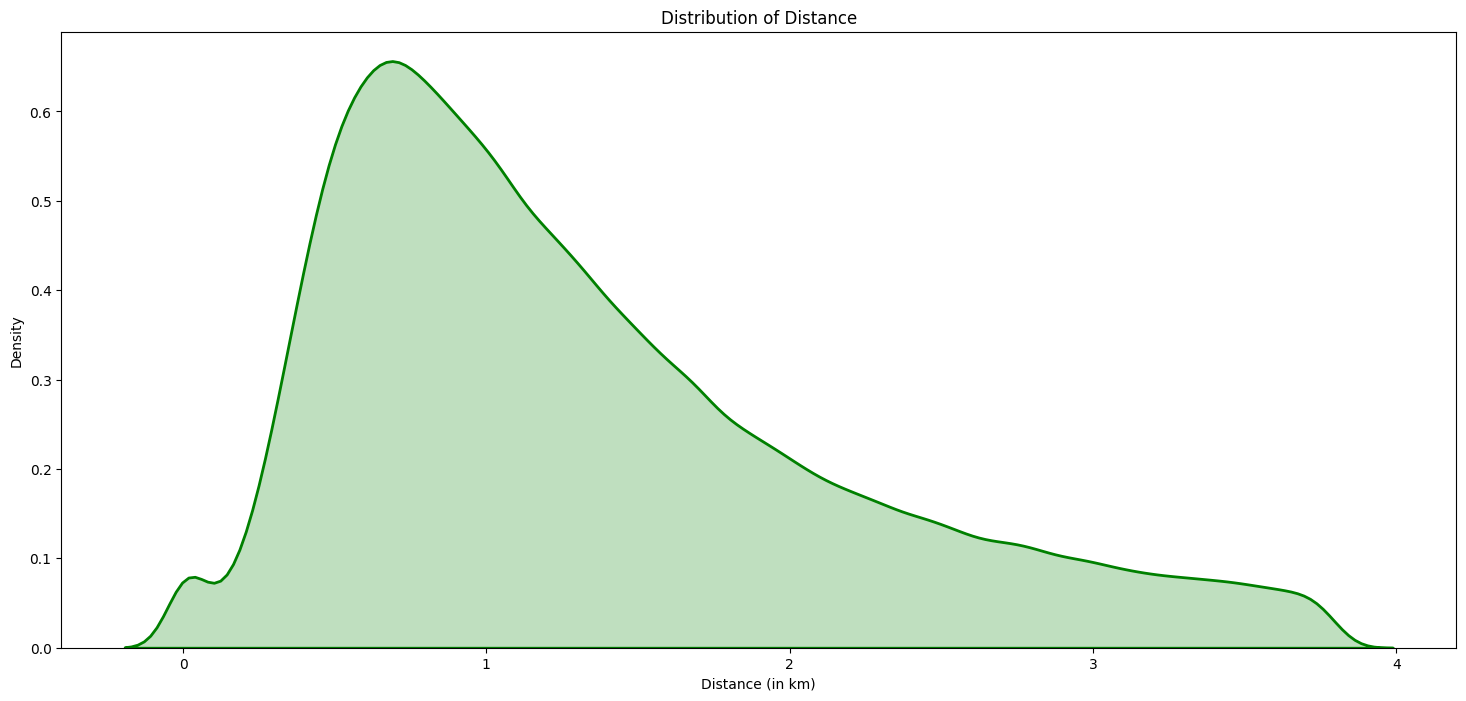

In [336]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
sns.distplot(df_test['distance'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, color="green", ax=ax)

ax.set_title("Distribution of Distance")
ax.set_xlabel("Distance (in km)")
ax.set_ylabel("Density")

In [337]:
#this is almost near to normal distribution

## **Categorical variable conversion**

### ONE HOT ENCODING

In [297]:
#adding dummy variable to convert categorical data to numerical data through one hot encoding
df_train=pd.get_dummies(df_train,columns=['pickup_day_of_the_week', 'dropoff_day_of_the_week'],drop_first=True)

In [327]:
df_test = pd.get_dummies(df_test,columns=['pickup_day_of_the_week'],drop_first=True)

In [328]:
df_test.shape

(624258, 22)

In [298]:
df_train.shape

(1141470, 36)

#### now i am going to remove the features which are correlated based on the heatmap

In [302]:
#Highly correlated features:
#['dropoff_month', 
#'pickup_month',
#'trip_duration', 'distance_km', 'pickup_hour', 'distance', 'trip_in_minutes', 'dropoff_hour']

In [307]:

features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag','pickup_day_of_the_week_Monday',
       'pickup_day_of_the_week_Saturday', 'pickup_day_of_the_week_Sunday',
       'pickup_day_of_the_week_Thursday', 'pickup_day_of_the_week_Tuesday',
       'pickup_day_of_the_week_Wednesday']

In [308]:
final_df=df_train[features]
final_df.shape

(1141470, 14)

# Supervised Machine Learning of NYC taxi trip duration

In [354]:
# define a  function to calculate evaluation metrics
def evaluation_metrics (x_train,y_train,y_predicted):
    
#calculation of mean_squared_error(MSE) using mean square function in the sckit_learn package.
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)

#calculation of root mean square error by square rooting the mean square error
  RMSE=math.sqrt(MSE)

#using r2_score function in the sckit learn package we calculated the R-squared score (coefficient of determination).
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)

#Adjusted the R-squared score for the number of features in the model.
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
    
#Print the calculated evaluation metrics
  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)

#Plotting Actual and Predicted Values(plotted first 100 points)
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red') 
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)
     

## Linear Regression

In [355]:
x=final_df[features]
y=df_train["trip_in_minutes"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Mean Squared Error: 22.5064 Root Mean Squared Error: 4.744091061520637
R2 Score : 0.48855811381075254 Adjusted R2 Score : 0.4885502727110925


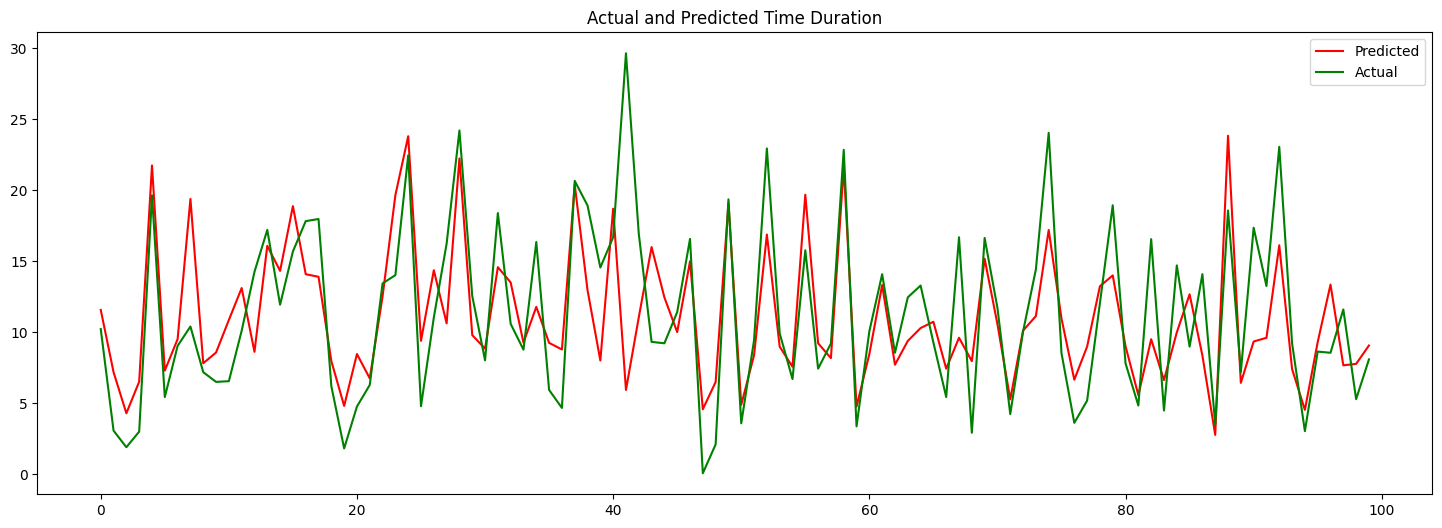

In [356]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 22.4118 Root Mean Squared Error: 4.734110264875545
R2 Score : 0.4903915439337784 Adjusted R2 Score : 0.49036029043089413


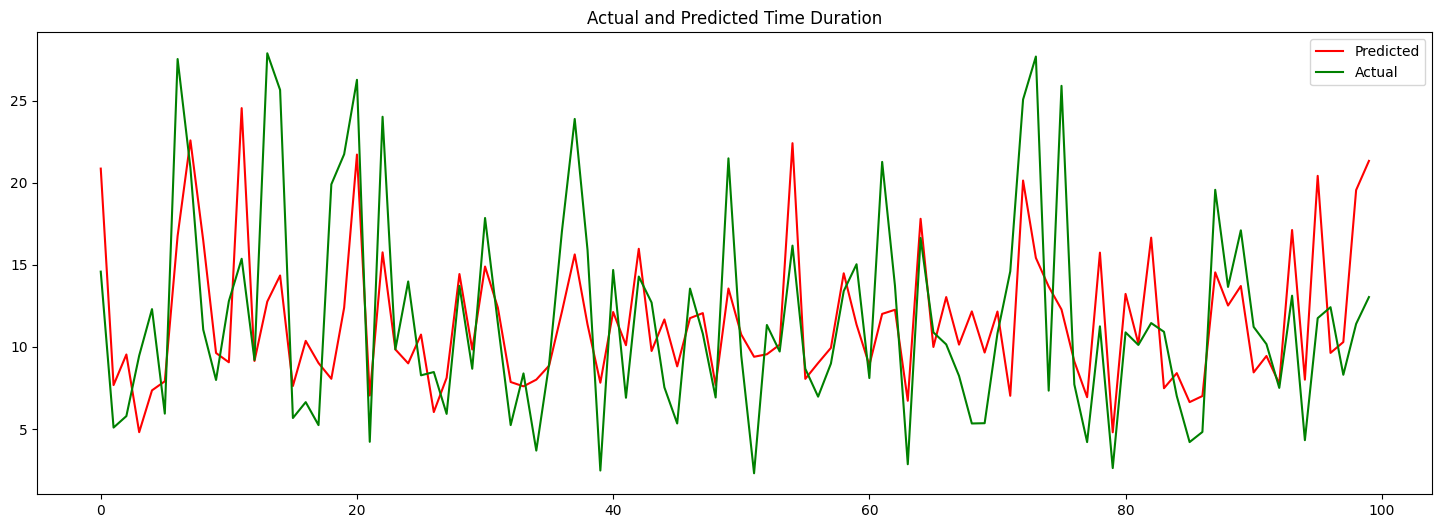

In [357]:
evaluation_metrics(x_test,y_test,y_pred_test)